In [59]:

from DNA import DNA
from Graficador import *
from Seleccion import Seleccion
import pandas as pd
from Cromosoma import Cromosoma

In [60]:
DATOS_EN_TABLA = '../TablaCapitales.xlsx' 
RUTA =  DATOS_EN_TABLA
FILAS_TABLA = 24 
lista_provincias_visitadas = []
cantidad_km = 0 

df = pd.read_excel(DATOS_EN_TABLA)

def devolver_informacion_tabla_crudo():
    df = pd.read_excel(RUTA)
    tabla = df.values 
 
    return tabla

In [61]:
def procesar_informacion_tabla(tabla: pd.DataFrame):
    lista_provincias = list(tabla[:,0])
    
    return [lista_provincias, tabla]

lista_provincias,tabla = procesar_informacion_tabla(devolver_informacion_tabla_crudo())

In [62]:
def get_distance(city1: str, city2: str) -> float:
    distancia = tabla[city1][city2+1]
    if type(distancia) == float:
        return distancia 


In [63]:
datos = []


In [64]:
obtener_mejor_cromosoma = lambda poblacion: sorted(poblacion, key=lambda cromosoma: cromosoma.fitness, reverse=True)[0]

In [65]:
def ciclo(poblacion,fObjetivo,fFitness,numero_ciclo):
    DNA1 =  DNA(poblacion)
    elites = []
    res_objetivo = DNA1.calcular_objetivo(fObjetivo)
    res_fitness = DNA1.calcular_fitness(fFitness)
 
 
    elites = Seleccion.elitismo(DNA1.poblacion,2)  
    cantidad = 50-len(elites)
    
    cromosomas_padres = Seleccion.torneo(DNA1.poblacion,cantidad)  
    cromosomas_hijos = DNA.cruzar_poblacion_numeros(cromosomas_padres)    

    mejor_cromosoma = obtener_mejor_cromosoma(poblacion)
    datos.append([numero_ciclo,mejor_cromosoma.genes,mejor_cromosoma.fitness,mejor_cromosoma.objetivo])

    if len(cromosomas_hijos)>0:
        nueva_poblacion = cromosomas_hijos + elites

    return nueva_poblacion


In [66]:
import pandas as pd
ciclos = 200
cantidad_cromosomas = 50
funcion_objetivo = lambda x,y: get_distance(x,y)       
fitness = lambda x: 1/x  
Cromosoma.setProbMutacion(0.4)
Cromosoma.setProbCrossover(0.75)
poblacion = DNA.generar_poblacion_numeros(cantidad_cromosomas) 

mejor_cromosoma = [0,None] 

for i in range(ciclos):
    nueva_poblacion = ciclo(poblacion,funcion_objetivo,fitness,i)

    if i == ciclos-1:
        res = obtener_mejor_cromosoma(poblacion)
        mejor_cromosoma[0] = res.objetivo
        mejor_cromosoma[1] = res 
            
    
    poblacion = nueva_poblacion 

In [67]:
    
ultimo_cromosoma = mejor_cromosoma[1]
dist_total = 0
datos_mejor_cromosoma = []

for ciudad in range(0,len(ultimo_cromosoma.genes)-1):
    ciudad1 = ultimo_cromosoma.genes[ciudad]
    ciudad2 = ultimo_cromosoma.genes[ciudad+1]
    distancia = get_distance(ciudad1,ciudad2)
    dist_total += distancia
    
    datos_mejor_cromosoma.append([lista_provincias[ciudad1],lista_provincias[ciudad2],int(distancia)])


ciudad_inicio = ultimo_cromosoma.genes[0]
ciudad_fin = ultimo_cromosoma.genes[-1]
distancia_inicio_fin = get_distance(ciudad_inicio,ciudad_fin)


datos_mejor_cromosoma.append([lista_provincias[ciudad_fin],lista_provincias[ciudad_inicio],int(distancia_inicio_fin)])

df = pd.DataFrame(datos_mejor_cromosoma, columns=['Ciudad 1','Ciudad 2','Distancia'])
df['Distancia Acumulada'] = df['Distancia'].cumsum()
print(f'KM(Totales):  {ultimo_cromosoma.objetivo} km | fitness = {ultimo_cromosoma.fitness}') 
df
 


KM(Totales):  11000.0 km | fitness = 9.09090909090909e-05


,Ciudad 1,Ciudad 2,Distancia,Distancia Acumulada
0,Salta,S.M. de Tucumán,228,228
1,S.M. de Tucumán,La Rioja,330,558
2,La Rioja,San Juan,283,841
3,San Juan,Mendoza,152,993
4,Mendoza,S.F.d.V.d. Catamarca,569,1562
5,S.F.d.V.d. Catamarca,Sgo. Del Estero,166,1728
6,Sgo. Del Estero,Resistencia,523,2251
7,Resistencia,Corrientes,13,2264
8,Corrientes,La Plata,830,3094
9,La Plata,Cdad. de Bs. As.,53,3147


In [68]:
df = pd.DataFrame(datos, columns=['i', 'ruta', 'fitness', 'objetivo'])
df


,i,ruta,fitness,objetivo
0,0,"[5, 20, 3, 17, 8, 19, 11, 15, 13, 6, 0, 9, 18,...",0.000046,21885.0
1,1,"[14, 0, 18, 16, 5, 9, 13, 6, 7, 22, 17, 8, 1, ...",0.000046,21582.0
2,2,"[14, 20, 18, 17, 5, 9, 13, 6, 7, 22, 0, 8, 1, ...",0.000048,20620.0
3,3,"[14, 20, 18, 17, 5, 9, 13, 6, 7, 22, 0, 8, 1, ...",0.000049,20407.0
4,4,"[14, 20, 18, 17, 5, 21, 13, 6, 7, 22, 0, 8, 1,...",0.000053,19033.0
...,...,...,...,...
195,195,"[16, 14, 5, 17, 6, 13, 21, 11, 2, 4, 0, 19, 1,...",0.000091,11000.0
196,196,"[16, 14, 5, 17, 6, 13, 21, 11, 2, 4, 0, 19, 1,...",0.000091,11000.0
197,197,"[16, 14, 5, 17, 6, 13, 21, 11, 2, 4, 0, 19, 1,...",0.000091,11000.0
198,198,"[16, 14, 5, 17, 6, 13, 21, 11, 2, 4, 0, 19, 1,...",0.000091,11000.0


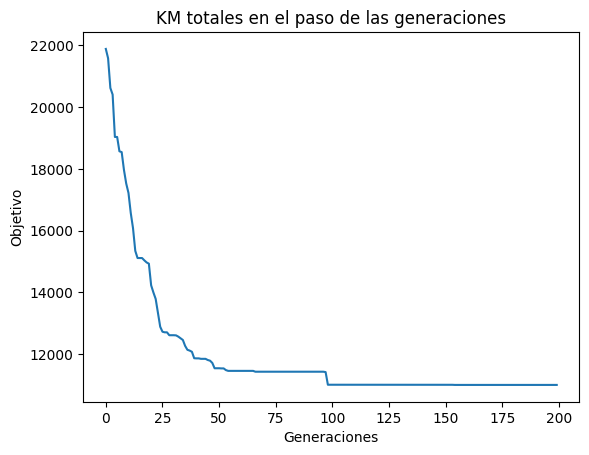

In [69]:
import matplotlib.pyplot as plt


objetivos, pasos = df['objetivo'], df['i']

plt.plot(pasos, objetivos)
plt.xlabel('Generaciones')
plt.ylabel('Objetivo')
plt.title('KM totales en el paso de las generaciones')
plt.show()
